# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

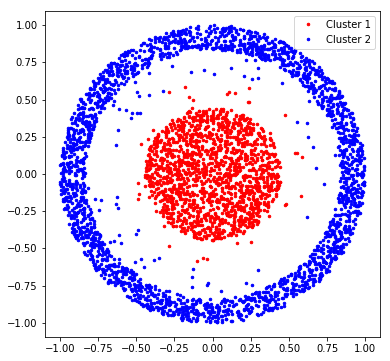

In [14]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 120
threshold = 0.2
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

(4078, 2) (4078,)


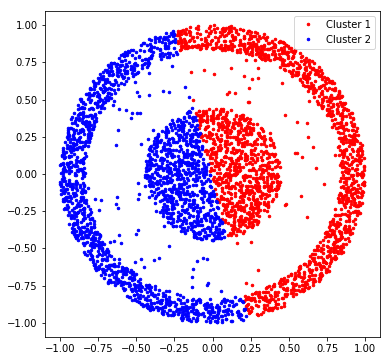

In [13]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [15]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [ ]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from spectral import spectral
from kmeans import kmeans

# YOUR CODE HERE
# begin answer
iters = 1000

W = constructW(fea,k=10).toarray()
k = np.unique(gnd).size

acc_spectral = 0
nmi_spectral = 0
acc_kmeans = 0
nmi_kmeans = 0

for i in range(iters):
    idx = spectral(W, k)
    spec_bestmap = bestMap(gnd, idx)
    acc_spectral += np.sum(gnd == spec_bestmap)*1.0/N
    nmi_spectral += MutualInfo(gnd,spec_bestmap)
    
    idx = kmeans(fea.toarray(), k)
    kmeans_bestmap = bestMap(gnd, idx)
    acc_kmeans += np.sum(gnd == kmeans_bestmap)*1.0/N
    nmi_kmeans += MutualInfo(gnd,kmeans_bestmap)

acc_spectral /= iters
nmi_spectral /= iters
acc_kmeans /= iters
nmi_kmeans /= iters

print ("accuracy of spectral clustering:", acc_spectral)
print ("normalized mutual information of spectral cluserting: ", nmi_spectral)
print ("accuracy of kmeans:",acc_kmeans)
print ("normalized mutual information of kmeans:", nmi_kmeans)
    
# end answer